### Plot No. 1: Raw data of one BHE
from July 1., 2018 to July 31, 2023 (complete data period)

In [1]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import numpy as np
import pandas as pd
from datetime import datetime as dt
from dateutil.relativedelta import *
import pickle
from functools import reduce

In [2]:
from helpers import load, plot
fig_width = 6.33
plot.ERC_Management().set_plot_params()

In [2]:

BHE = 16
BHE_data = load.load_raw_data("2018-07-01 00:00:00", "2023-07-30 23:59:59", BHEs = BHE)

KeyboardInterrupt: 

In [ ]:
colordict = {'RC': '#1F862F', 'Shem': '#EC6676',
'Hyb': '#9D3B74', 'Gfunc': '#CDB93D', 
'Tin_M': '#4474A2', 'Tout_M': '#70CAE6', 'Vdot': 
'#BABABA'}

In [ ]:
from matplotlib.ticker import FormatStrFormatter
from matplotlib.transforms import ScaledTranslation

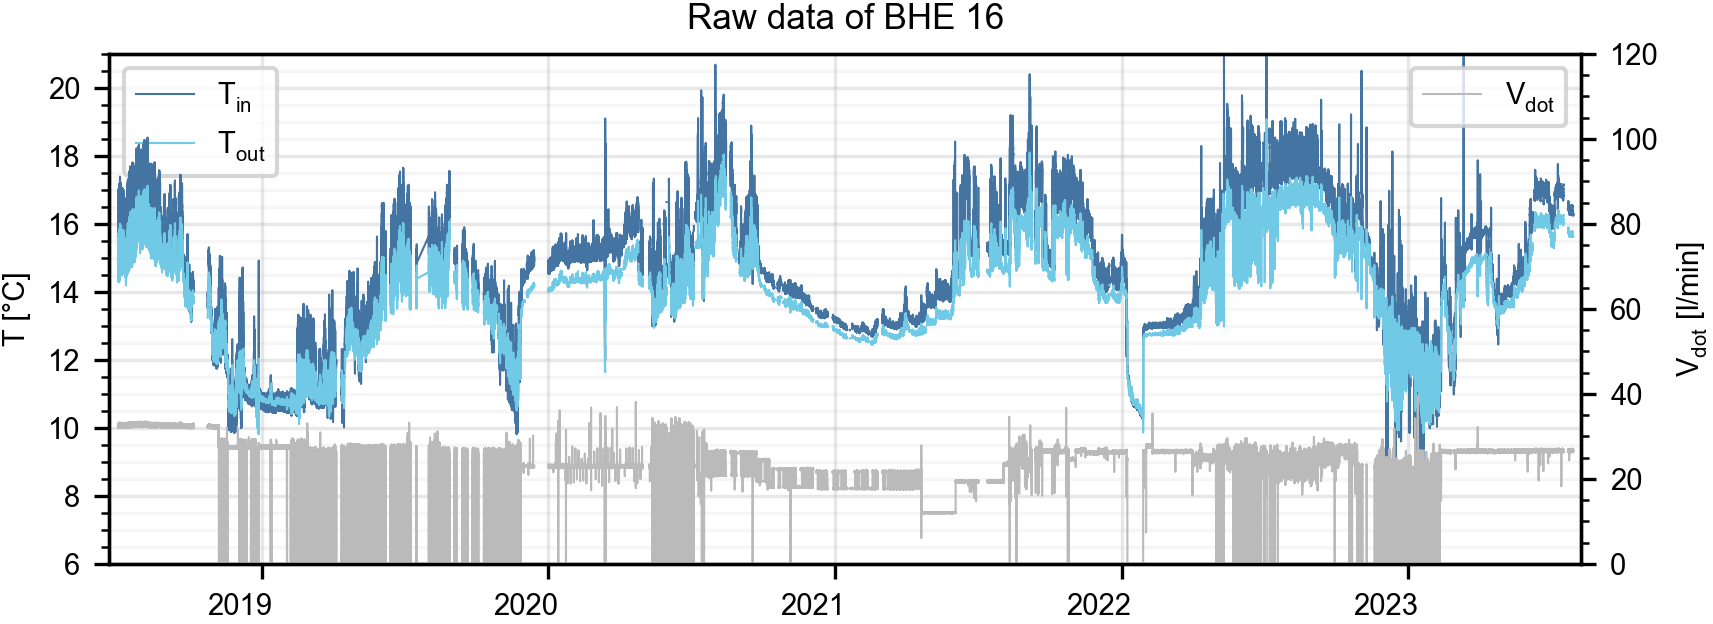

In [16]:
fig, ax = plt.subplots(1,1,figsize=(fig_width,2.5), dpi=300)
linewidth = .5
ax2 = ax.twinx()
BHE_data.plot(ax=ax2, y=f'Probe_{BHE:02d}_V_dot', color=colordict.get('Vdot'), linewidth=linewidth, x_compat=True, label='$\mathregular{V_{dot}}$',zorder=-10, legend=False)#style = '-.', dashes=(3, 5, 1, 5, 1, 5), 
BHE_data.plot(ax=ax, y=f'Probe_{BHE:02d}_T_in', color=colordict.get('Tin_M'),linewidth=linewidth, x_compat=True, label='$\mathregular{T_{in}}$',zorder=10, legend=False)#, alpha=.6
BHE_data.plot(ax=ax, y=f'Probe_{BHE:02d}_T_out', color=colordict.get('Tout_M'), linewidth=linewidth,x_compat=True, label='$\mathregular{T_{out}}$',zorder=11, legend=False)#style='--', dashes=(3,3), 
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

## Wenn wir MPC Perioden wissen
#ax.axvspan('2021-08-01', '2022-01-31', facecolor='palegreen', edgecolor='none', alpha=.2, label='Optmizized operation')


ax2.set_ylim(0,120)
ax2.set_ylabel('$\mathregular{V_{dot}}$ [l/min]')

ax.grid(alpha=.3, which='major')
ax.grid(alpha=.1, which='minor')
ax.set_ylabel('T [°C]')
ax.set_xlabel('')
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

# Label locations transformieren, ist sonst nach links versetzt
#resource: https://matplotlib.org/stable/gallery/ticks/date_concise_formatter.html
dx, dy = 10, 0
offset = ScaledTranslation(dx / fig.dpi, dy / fig.dpi, fig.dpi_scale_trans)
for label in ax.get_xticklabels():
        label.set_transform(label.get_transform() + offset)

for label in ax.get_xticklabels():
        label.set_rotation(0)

ax.set_ylim(6,21)
ax.set_xlim("2018-06-20 00:00:00", "2023-08-10 00:00:00")

ax.set_title(f'Raw data of BHE {BHE:02d}')
fig.savefig(f'Raw_data_full_period_{BHE:02d}.pdf', bbox_inches='tight')

### Plot all data for shorter period

In [3]:
## Load data
start_date = '2023-02-08 12:00:00' #gut um nans zu zeigen
end_date = '2023-02-14 18:00:00'
#start_date = '2022-06-01 01:00:00' #gut um nans zu zeigen
#end_date = '2022-06-05 02:05:00'
data = load.load_raw_data(start_date, end_date, masked=True)

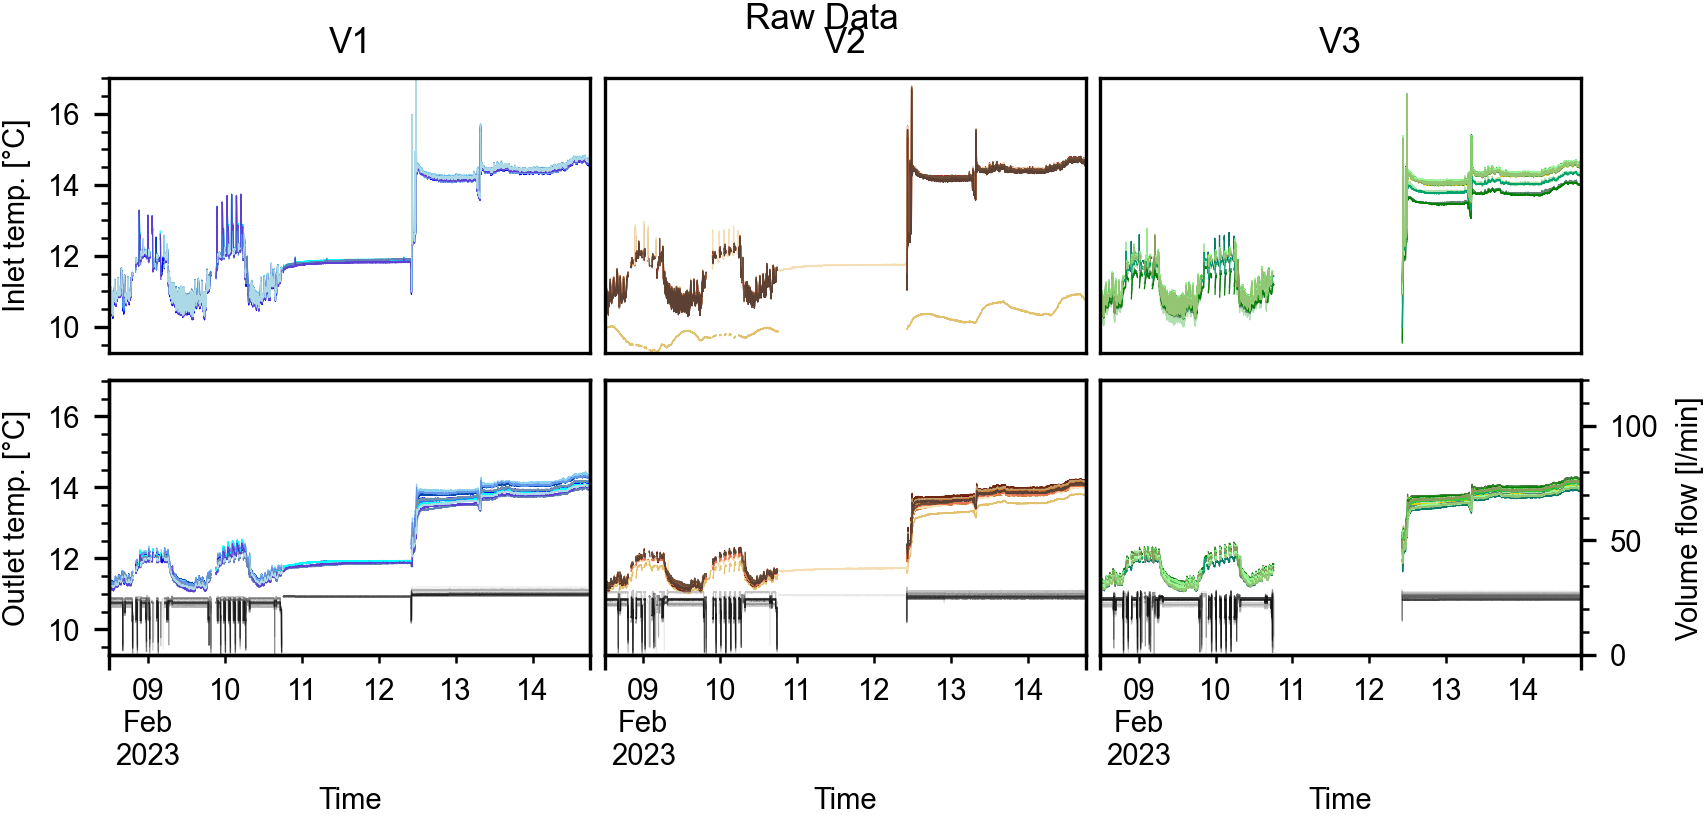

In [4]:
fig = plot.plot_data_by_vault(data, title='Raw Data', figsize=(fig_width,2.5), dpi=300)#, ylims=[10.2, 15.5]) #.loc[pd.to_datetime('2022-06-01 00:00:00'):pd.to_datetime('2022-06-05 12:00:00')]
fig.savefig('Raw_data_by_vault.pdf', bbox_inches='tight')